## Predict permanent magnet synchronous motor (PMSM) rotor temperature with Fedot.Industrial

The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. All recordings are sampled at 2 Hz. The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns "i_d" and i_q") and voltages in d/q-coordinates (columns "u_d" and "u_q") are a result of a standard control strategy trying to follow the reference speed and torque. This "sample" of ElectricMotorTemperature dataset was created by first splitting the measurement sessions into groups of 30 consecutive seconds, i.e. 60 timepoints. Then, used the **recorded ambient**, **coolant temperatures**, **d and q components of voltage**, **current** as predictors to form 6- dimensional time series of length 60. The target variable is the **maximum recorded rotor temperature during each respective 30-second time frame**. The resulting dataset has 22148 instances, of which 70% were sampled as training data and the remaining 30% as testing data.
Link to the dataset - https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature

In [2]:
import sys
import os

project_path = r"add_project_path_here\Fedot.Industrial"
sys.path.append(project_path)

In [3]:
import pandas as pd
from fedot.core.pipelines.pipeline_builder import PipelineBuilder
from fedot_ind.tools.loader import DataLoader
import matplotlib
from fedot_ind.api.main import FedotIndustrial
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate

The list of basic fedot industrial models for experiment are shown below. We are using simple linear machine learning pipelines with 3 different feature generators: Statistical, Recurrence, Topological. And for each of them we add PCA transformation with 90 % of explained dispersion.

In [4]:
from fedot_ind.core.repository.config_repository import DEFAULT_COMPUTE_CONFIG, DEFAULT_REG_AUTOML_CONFIG, DEFAULT_AUTOML_LEARNING_CONFIG

initial_assumption = {0: ['quantile_extractor', 'treg']}

API_CONFIG = {'industrial_config': {'problem': 'regression'},
              'automl_config': DEFAULT_REG_AUTOML_CONFIG,
              'learning_config': {'learning_strategy': 'from_scratch',
                                  'learning_strategy_params': DEFAULT_AUTOML_LEARNING_CONFIG,
                                  'optimisation_loss': {'quality_loss': 'rmse'}},
              'compute_config': DEFAULT_COMPUTE_CONFIG}
METRIC_NAMES = ('r2', 'rmse', 'mae')
DATASET_NAME = 'ElectricMotorTemperature'
data_path = project_path + '/examples/data'

In [5]:
api_client = ApiTemplate(api_config=API_CONFIG,
                         metric_list=METRIC_NAMES)

Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train regression model.

At the end of the experiment we can obtain the desired metric values using `calculate_regression_metric` method. Now there are five available metrics for classification task:
- `explained_variance_score`
- `max_error`
- `mean_absolute_error`
- `mean_squared_error`
- `d2_absolute_error_score`.
- `median_absolute_error`
- `r2_score`

In [7]:
result_dict = api_client.eval(dataset=DATASET_NAME, finetune=True, initial_assumption=initial_assumption)

2025-01-27 03:42:21,695 - Reading data from C:\Users\Bars\PycharmProjects\Fedot.Industrial\fedot_ind\data\ElectricMotorTemperature
2025-01-27 03:42:21,701 - Data not found in C:\Users\Bars\PycharmProjects\Fedot.Industrial\fedot_ind\data\ElectricMotorTemperature
2025-01-27 03:42:21,703 - Downloading ElectricMotorTemperature from http://www.timeseriesclassification.com/aeon-toolkit/...
2025-01-27 03:44:40,060 - ElectricMotorTemperature data downloaded. Unpacking...
2025-01-27 03:44:40,062 - Reading data from C:\Users\Bars\PycharmProjects\Fedot.Industrial\temp_cache/temp_data/ElectricMotorTemperature
2025-01-27 03:45:08,290 - Saving ElectricMotorTemperature data files to C:\Users\Bars\PycharmProjects\Fedot.Industrial\fedot_ind\data\ElectricMotorTemperature
2025-01-27 03:45:08,316 - Data read successfully from local folder
2025-01-27 03:45:09,696 - --------------------------------------------------
2025-01-27 03:45:09,698 - Initialising Industrial Repository
2025-01-27 03:45:09,700 - -----

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/1550 [00:00<?, ?it…

2025-01-27 03:47:09,953 - Caching features
2025-01-27 03:47:11,555 - Trying to load features from cache
2025-01-27 03:47:11,558 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:04:35,865 - Caching features
2025-01-27 04:04:36,200 - OptunaTuner - Initial graph: {'depth': 2, 'length': 2, 'nodes': [treg, quantile_extractor]}
treg - {}
quantile_extractor - {} 
Initial metric: [8.707]


[I 2025-01-27 04:04:36,202] A new study created in memory with name: no-name-1aa9704d-6f23-4ed6-81f7-bd1bdc2fcbb8


2025-01-27 04:04:36,284 - Trying to load features from cache
2025-01-27 04:04:36,294 - Trying to load features from cache
2025-01-27 04:04:36,297 - Trying to load features from cache
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.01082 sec2025-01-27 04:04:36,298 - Trying to load features from cache

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00945 sec2025-01-27 04:04:36,299 - Trying to load features from cache

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00743 sec2025-01-27 04:04:36,303 - Trying to load features from cache

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00835 sec
2025-01-27 04:04:36,304 - Trying to load features from cache
2025-01-27 04:04:36,308 - Trying to load features from cache
2025-01-27 04:04:36,315 - Trying to load features from cache
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.0157 sec
Features of basis

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:04:48,183 - Trying to load features from cache
2025-01-27 04:04:48,331 - Cache not found
2025-01-27 04:04:52,004 - Trying to load features from cache
2025-01-27 04:04:52,590 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:04:58,416 - Trying to load features from cache
2025-01-27 04:04:59,632 - Cache not found
2025-01-27 04:05:04,340 - Trying to load features from cache
2025-01-27 04:05:09,038 - Cache not found
2025-01-27 04:05:09,969 - Trying to load features from cache


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:05:12,147 - Trying to load features from cache
2025-01-27 04:05:17,123 - Trying to load features from cache


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:05:23,464 - Trying to load features from cache
2025-01-27 04:05:25,364 - Cache not found
2025-01-27 04:05:27,188 - Trying to load features from cache
2025-01-27 04:05:35,502 - Trying to load features from cache


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:05:35,528 - Cache not found
2025-01-27 04:05:36,018 - Trying to load features from cache
2025-01-27 04:05:46,061 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 04:05:55,894 - Cache not found
2025-01-27 04:06:16,200 - Cache not found
2025-01-27 04:06:26,325 - Cache not found
2025-01-27 04:06:46,628 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 07:17:29,479 - Caching features
2025-01-27 07:21:22,626 - Caching features
2025-01-27 07:22:30,979 - Caching features
2025-01-27 07:22:31,086 - Caching features
2025-01-27 07:22:31,125 - Caching features
2025-01-27 07:22:31,254 - Caching features
2025-01-27 07:22:31,255 - Caching features
2025-01-27 07:22:31,255 - Caching features
2025-01-27 07:22:31,360 - Caching features
2025-01-27 07:22:32,298 - OptunaTuner - Hyperparameters optimization finished
2025-01-27 07:22:32,338 - Trying to load features from cache
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00765 sec
2025-01-27 07:22:40,177 - Trying to load features from cache
2025-01-27 07:22:40,179 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/13953 [00:00<?, ?i…

2025-01-27 07:38:32,147 - Caching features
2025-01-27 07:38:32,506 - OptunaTuner - Return tuned graph due to the fact that obtained metric 7.591 equal or better than initial (+ 0.05% deviation) 8.702
2025-01-27 07:38:32,509 - OptunaTuner - Final graph: {'depth': 2, 'length': 2, 'nodes': [treg, quantile_extractor]}
treg - {'max_features': 0.6240015211138573, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False}
quantile_extractor - {}
2025-01-27 07:38:32,510 - OptunaTuner - Final metric: 7.591
2025-01-27 07:38:33,756 - Trying to load features from cache
2025-01-27 07:38:33,758 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/15503 [00:00<?, ?i…

2025-01-27 07:56:11,182 - Caching features
2025-01-27 07:56:53,635 - Trying to load features from cache
2025-01-27 07:56:53,636 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/6645 [00:00<?, ?it…

2025-01-27 08:04:25,527 - Caching features
2025-01-27 08:04:25,804 - Trying to load features from cache
2025-01-27 08:04:25,806 - Cache not found


compute_feature_extraction_with_Statistical Class for TS representation:   0%|          | 0/6645 [00:00<?, ?it…

2025-01-27 08:11:58,622 - Caching features


In [8]:
import numpy as np
features = np.array(api_client.train_data[0].tolist()).astype(float)

Lets check our data.

In [9]:
features.shape

(15503, 6, 60)

Lets visualise our predictors.

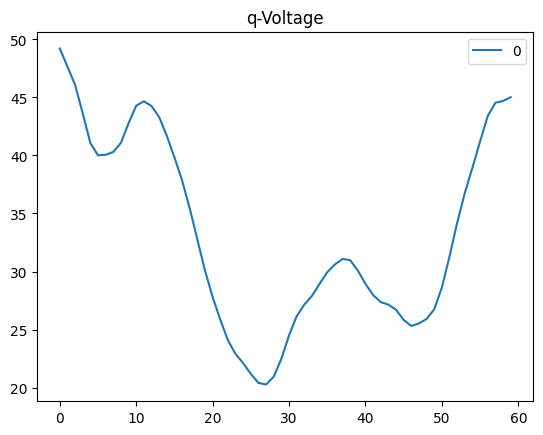

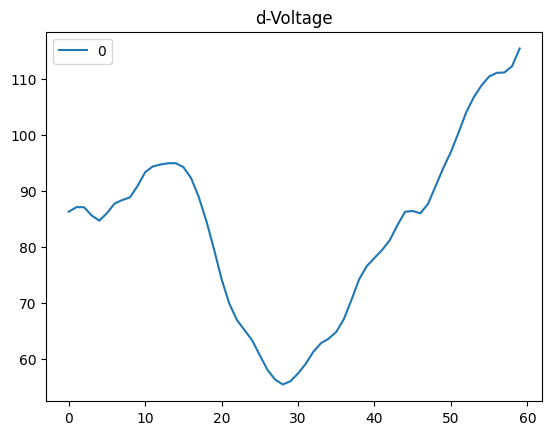

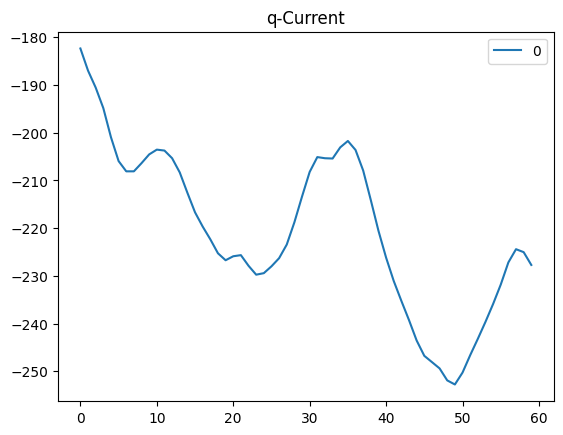

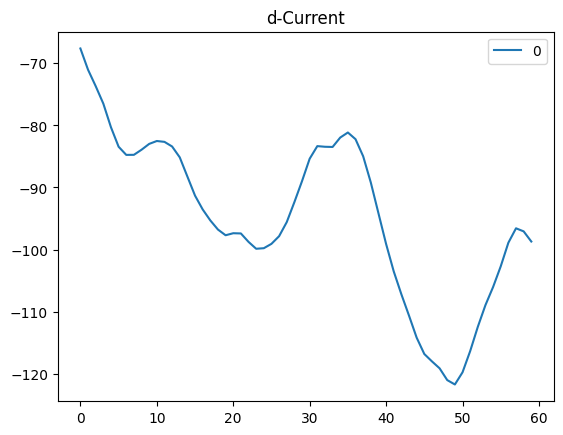

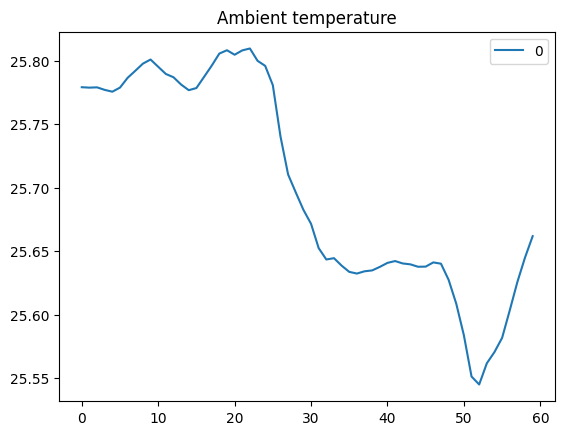

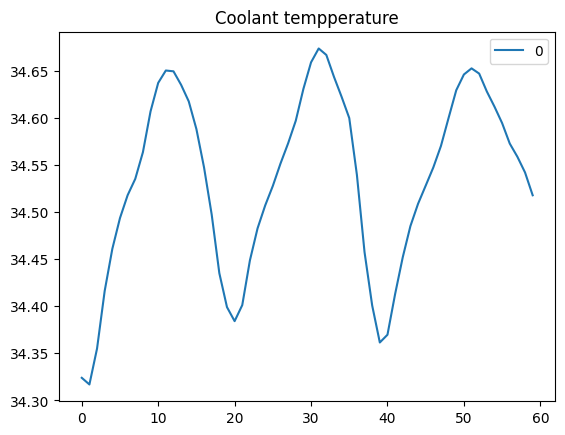

In [10]:
from matplotlib import pyplot as plt
pd.DataFrame(features[1, 0, :]).plot(title='q-Voltage')
pd.DataFrame(features[1, 1, :]).plot(title='d-Voltage')
pd.DataFrame(features[1, 2, :]).plot(title='q-Current')
pd.DataFrame(features[1, 3, :]).plot(title='d-Current')
pd.DataFrame(features[1, 4, :]).plot(title='Ambient temperature')
pd.DataFrame(features[1, 5, :]).plot(title='Coolant tempperature')
plt.show()

In [55]:
labels = result_dict['labels']
metrics = result_dict['metrics']

In [56]:
metrics

,r2,rmse,mae
0,0.946,4.449,2.687


## AutoML approach

In [6]:
result_dict_auto = api_client.eval(dataset=DATASET_NAME, finetune=False, initial_assumption=initial_assumption)

2025-01-27 13:44:36,461 - Reading data from C:\Users\Bars\PycharmProjects\Fedot.Industrial\fedot_ind\data\ElectricMotorTemperature
2025-01-27 13:45:05,261 - Data read successfully from local folder
2025-01-27 13:45:06,550 - --------------------------------------------------
2025-01-27 13:45:06,552 - Initialising Industrial Repository
2025-01-27 13:45:06,554 - -------------------------------------------------
2025-01-27 13:45:06,556 - Initialising Industrial Evolutionary Optimisation params
2025-01-27 13:45:06,684 - --------------------------------------------------
2025-01-27 13:45:06,685 - Initialising Dask Server
Creating Dask Server
2025-01-27 13:45:07,960 - State start
2025-01-27 13:45:07,993 -   Scheduler at: inproc://192.168.0.102/34776/1
2025-01-27 13:45:07,995 -   dashboard at:  http://192.168.0.102:8787/status
2025-01-27 13:45:07,998 - Registering Worker plugin shuffle
2025-01-27 13:45:08,042 -       Start worker at: inproc://192.168.0.102/34776/4
2025-01-27 13:45:08,044 -    

In [7]:
auto_labels = result_dict_auto['labels']
auto_metrics = result_dict_auto['metrics']

In [8]:
auto_metrics

,r2,rmse,mae
0,0.791,8.766,6.273


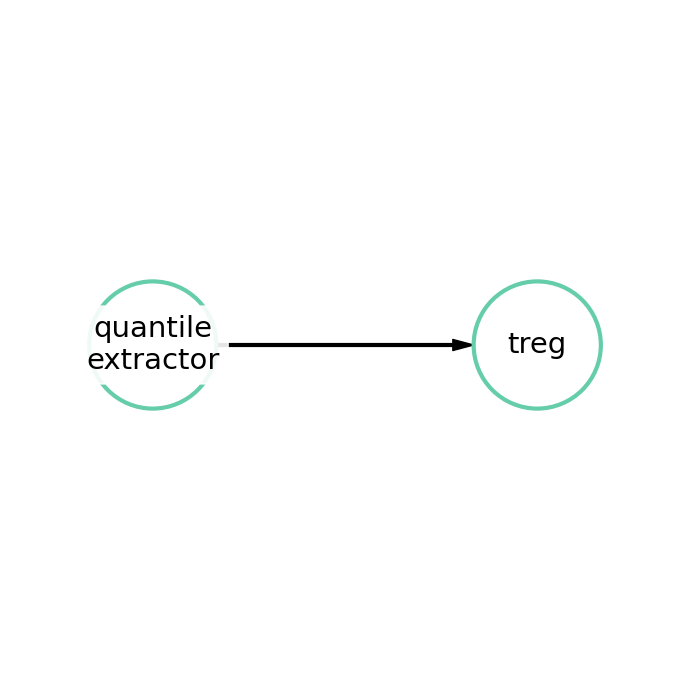

In [39]:
api_client.industrial_class.manager.solver.current_pipeline.show()

# Not implemented yet:

# api_client.industrial_class.plot_operation_distribution(mode='each')
# iapi_client.industrial_class.plot_fitness_by_generation()

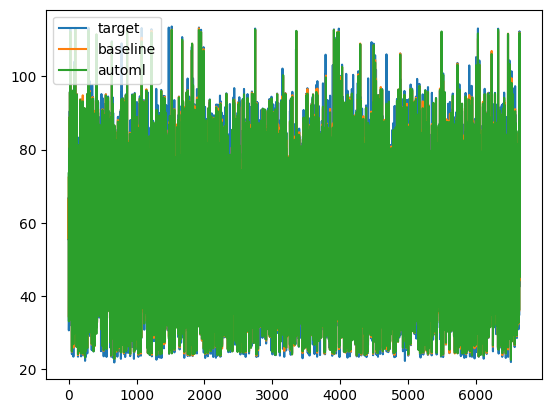

In [24]:
predictions = np.vstack([api_client.test_data[1].flatten(), labels.flatten(), auto_labels.flatten()]).T
all_prediction = pd.DataFrame(predictions, columns=['target', 'baseline', 'automl'])
all_prediction.plot()
plt.show()

## Compare with State of Art (SOTA) models

In [25]:
df = pd.read_csv(data_path+'/ts_regression_sota_results.csv',sep=';')

In [26]:
df = df[df['ds/type'] == dataset_name].iloc[:,:25]
df.index = df['algorithm']
df = df.drop(['algorithm','ds/type'], axis=1)
df = df.replace(',','.', regex=True).astype(float)

In [28]:
df['Fedot_Industrial_tuned'] = metrics['rmse'][0]
df['Fedot_Industrial_AutoML'] = auto_metrics['rmse'][0]
df = df.T

In [29]:
df.sort_values('min')

algorithm,min,max,average
Fedot_Industrial_AutoML,4.227000,4.227000,4.227000
Fedot_Industrial_tuned,4.234000,4.234000,4.234000
DrCIF_RMSE,4.404898,5.643865,4.656284
InceptionT_RMSE,4.432470,4.957914,4.728375
FreshPRINCE_RMSE,4.505233,4.808177,4.650170
RotF_RMSE,4.552434,4.934061,4.698074
RIST_RMSE,4.652734,4.921443,4.782016
SingleInception_RMSE,4.773094,5.635235,5.163396
RandF_RMSE,5.021132,5.447043,5.241818
XGBoost_RMSE,5.169760,5.485085,5.312691


In [30]:
df.sort_values('max')

algorithm,min,max,average
Fedot_Industrial_AutoML,4.227000,4.227000,4.227000
Fedot_Industrial_tuned,4.234000,4.234000,4.234000
FreshPRINCE_RMSE,4.505233,4.808177,4.650170
RIST_RMSE,4.652734,4.921443,4.782016
RotF_RMSE,4.552434,4.934061,4.698074
InceptionT_RMSE,4.432470,4.957914,4.728375
RandF_RMSE,5.021132,5.447043,5.241818
XGBoost_RMSE,5.169760,5.485085,5.312691
SingleInception_RMSE,4.773094,5.635235,5.163396
DrCIF_RMSE,4.404898,5.643865,4.656284


In [31]:
df.sort_values('average')

algorithm,min,max,average
Fedot_Industrial_AutoML,4.227000,4.227000,4.227000
Fedot_Industrial_tuned,4.234000,4.234000,4.234000
FreshPRINCE_RMSE,4.505233,4.808177,4.650170
DrCIF_RMSE,4.404898,5.643865,4.656284
RotF_RMSE,4.552434,4.934061,4.698074
InceptionT_RMSE,4.432470,4.957914,4.728375
RIST_RMSE,4.652734,4.921443,4.782016
SingleInception_RMSE,4.773094,5.635235,5.163396
RandF_RMSE,5.021132,5.447043,5.241818
XGBoost_RMSE,5.169760,5.485085,5.312691
